# Goal: Examine Keywords

### Look at Beto's recent tweets. Find his popular tweets and what he tweets about most.
Status Object: https://www.geeksforgeeks.org/python-status-object-in-tweepy/

In [7]:
#All libraries that I might need
import tweepy
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#insert your API keys
consumer_key = "insert_yours"
consumer_secret = "insert_yours"
access_token = "insert_yours"
access_token_secret = "insert_yours"

#initialize api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

#beto user info
beto_id = '342863309'
beto_user = "@BetoORourke"

In [8]:
#pull tweet information with these basic functions

def list_of_tweets(user_id, num_tweets):
    """
    user_id, string with numbers to represent a user id
    num_tweets, integer to represent number of tweets
        no matter the num you put, the max will be 200
        
    returns a list of tweets
    """
    return api.user_timeline(user_id = '342863309', count = num_tweets)

def tweet_info(tweets):
    """
    tweets should be a list of tweets 
        (ex: tweets generated from func list_of_tweets)
    returns panda dataframe of tweets, their id, and the tweet itself
    """
    lst = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
    df = pd.DataFrame(lst)
    df.columns = ["Created_At", "Id", "Text"]
    return df

def num_retweets(tweets):
    """
    tweets should be a list of tweets 
        (ex: tweets generated from func list_of_tweets)
    returns panda dataframe of tweets, 
        their id, the tweet itself, and number of retweets the tweet recieved
    """
    lst = [[tweet.created_at, tweet.id, tweet.text, tweet.retweet_count] for tweet in tweets]
    df = pd.DataFrame(lst)
    df.columns = ["Created_At", "Id", "Text", "Retweets"]
    return df
    
def num_likes(tweets):
    """
    tweets should be a list of tweets 
        (ex: tweets generated from func list_of_tweets)
    returns panda dataframe of tweets, 
        their id, the tweet itself, and number of likes the tweet recieved
    """
    lst = [[tweet.created_at, tweet.id, tweet.text, tweet.favorite_count] for tweet in tweets]
    df = pd.DataFrame(lst)
    df.columns = ["Created_At", "Id", "Text", "Likes"]
    return df

def average(df, column):
    """
    Find the average of a column in a dataframe
    """
    return int(df[column].mean())

In [9]:
#beto's retweets
list_tweets = list_of_tweets(beto_id,1000)
rts = num_retweets(list_tweets)
print(average(rts,"Retweets"))
rts.head() #200 tweets, covers about the span of a month

2571


,Created_At,Id,Text,Retweets
0,2022-06-30 16:00:32+00:00,1542538587543142404,If we want the best jobs in America to be crea...,578
1,2022-06-30 13:54:12+00:00,1542506792013266944,Greg Abbott brags about signing the most extre...,1418
2,2022-06-30 02:59:42+00:00,1542342083133837313,Help us defeat Greg Abbott. Pitch in before ou...,660
3,2022-06-30 00:56:22+00:00,1542311045183819777,It’s time for Texas to have a governor who car...,7169
4,2022-06-29 22:37:34+00:00,1542276115082911749,This is a campaign to ensure that women have t...,1249


### Visualize how often Beto tweets keywords & how popular they are
plot_date documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot_date.html

In [10]:
plt.rcParams["figure.figsize"]=15,10

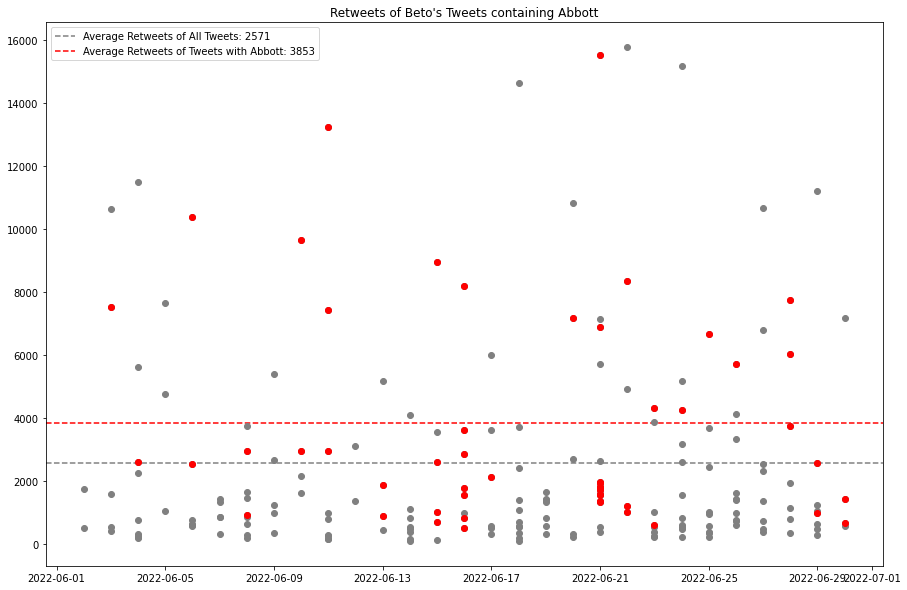

In [11]:
#make a dataframe a specific keyword & its respective metric
def keyword_df(df, keyword):
    """
    Dataframe must have Text column and a metric column. 
    """
    return df[df['Text'].str.contains(keyword, na=False)]

#plot tweets with this keyword compared to all user's tweets
def dated_plot_keyword(title, df, x, y, keyword, col_a, col_k, av):
    """
    title: string w title of plot
    df: a dataframe with the Created At column and a metric column 
        - use func num_retweets or num_likes
    x: represents the column that will be the x axis
        Must be dates as timestamp objects, it is okay for dates to repeat
    y: represents the metric column that will be the y axis
    keyword: string, represents the keyword we want to examine
    col_a: hex code w desired color for all tweets
    col_k: hex code w desired color for all tweets with keyword
    av: a boolean, if True will include a line with averages
    Returns a dated plot with dates as x and vals as y
    """
    plt.rcParams["figure.figsize"]=15,10
    plt.title(title)
    
    x_all = df[x]
    y_all = df[y]
    keydf = keyword_df(df, keyword)
    y_keyword = keydf[y]
    
    dates_all = []
    for i in x_all:
        dates_all.append(i.date())
    dates_kw = []
    for j in keydf[x]:
        dates_kw.append(j.date())
        
    if av:
        av_all = average(df, y)
        av_keyword = average(keydf, y)
        plt.axhline(y = av_all, color= col_a, linestyle='dashed', label = ("Average " + y + " of All Tweets: " + str(av_all)))
        plt.axhline(y = av_keyword, color= col_k, linestyle='dashed', label = ("Average " + y + " of Tweets with " + keyword + ": " + str(av_keyword)))
        plt.legend()
    
    plt.plot_date(dates_all, y_all, 'o', color = col_a, label = "All Tweets")
    plt.plot_date(dates_kw, y_keyword, 'o', color = col_k, label = ("Tweets with " + keyword))
    
t = "Retweets of Beto's Tweets containing Abbott"
dated_plot_keyword(t, rts, "Created_At", "Retweets", "Abbott", "grey", "red", True)

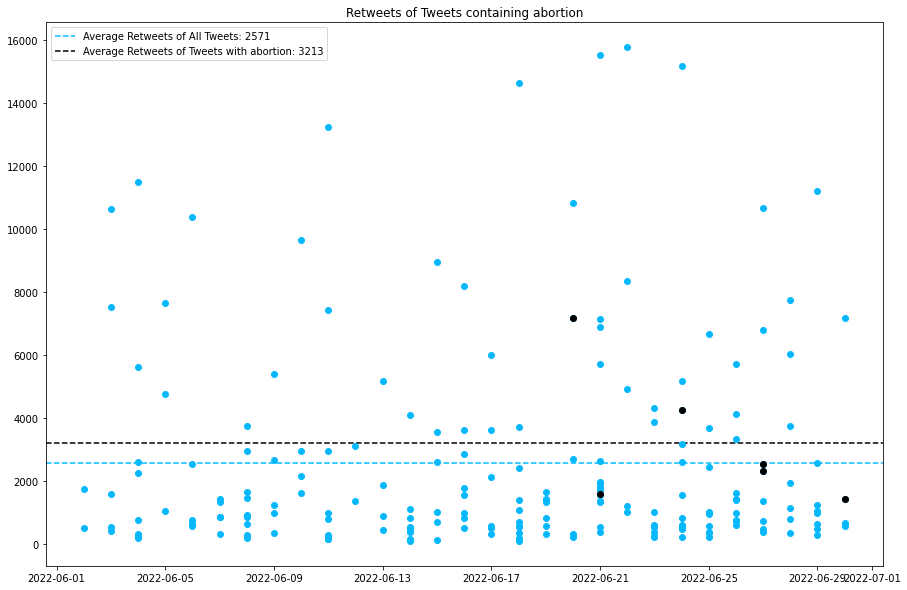

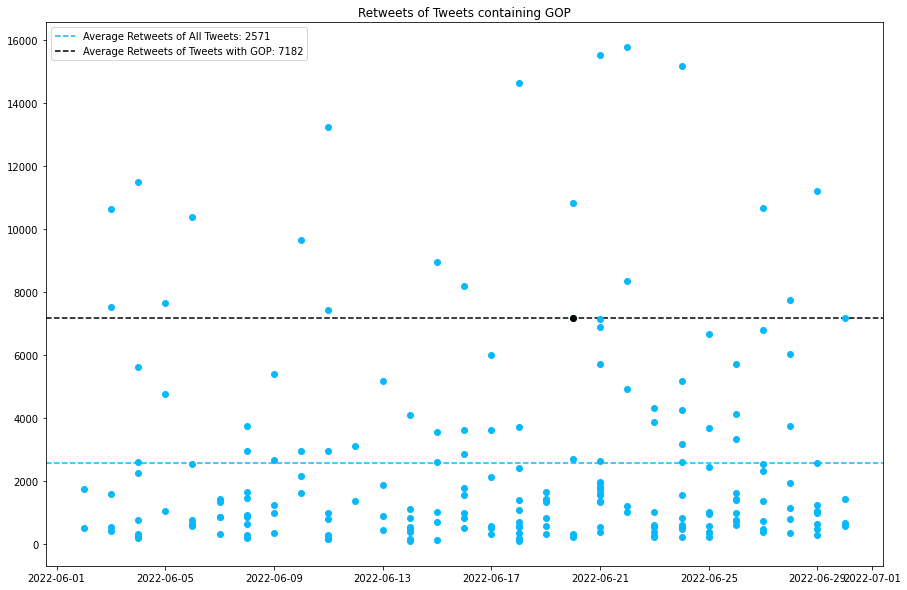

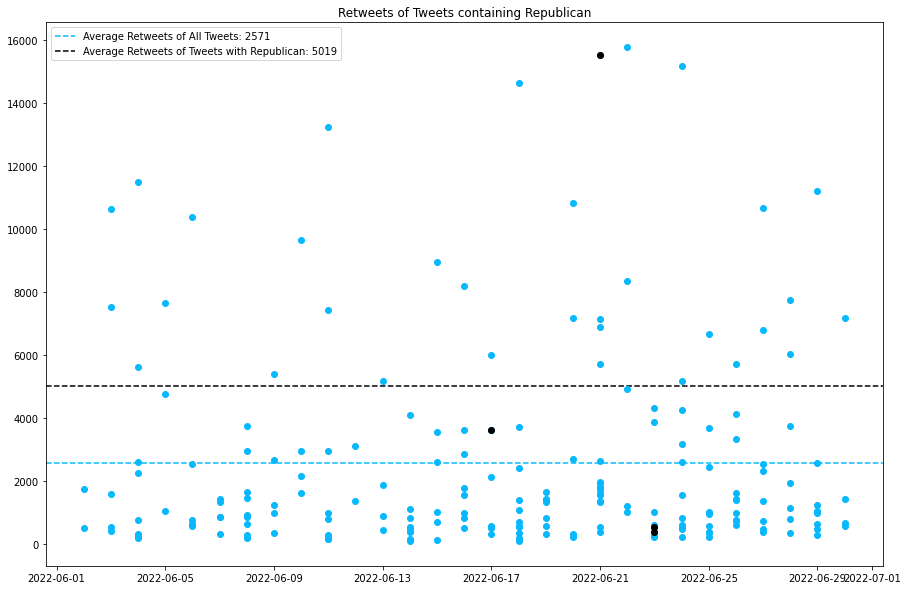

In [15]:
#if you have multiple keywords to look at
def ky_plots(df, keyword_lst, x, y, col_a, col_k, av, save):
    """
    - df: a dataframe with the Created At column and a metric column 
        - use func num_retweets or num_likes
    - keyword: a list of strings of keywords we want to examine
    - x: represents the column that will be the x axis
        Must be dates as timestamp objects, it is okay for dates to repeat
    - y: represents the metric column that will be the y axis
    - col_a: hex code w desired color for all tweets
    - col_k: hex code w desired color for all tweets with keyword
    - av: a boolean, if True will include a line with averages
    - save: string with location on computer to save plots on (end w /)
        - func will create file name
        - comment if you don't wish to save plots
    
    Make plots to compare specific keywords with all tweets
    """
    for k in keyword_lst:
        tle = (y + " of Tweets containing " + k)
        plt.clf()
        dated_plot_keyword(tle, df, x, y, k, col_a, col_k, av)
        
        #comment if you do not want to save plts
        url = save + "tweets_with_" + k + ".jpg"
        plt.savefig(url)
        
        plt.show()
        

#words = ['schools', 'gun', 'grid', 'Abbott']
words = ['abortion','GOP', 'Republican']
    #he hasn't tweeted the words mobilize, border, Abortion, 
sv = "/Users/sejalgupta/Documents/BETO WORK/twitter/"
ky_plots(rts, words, "Created_At", "Retweets", "#07B9FC", "black", True, sv)

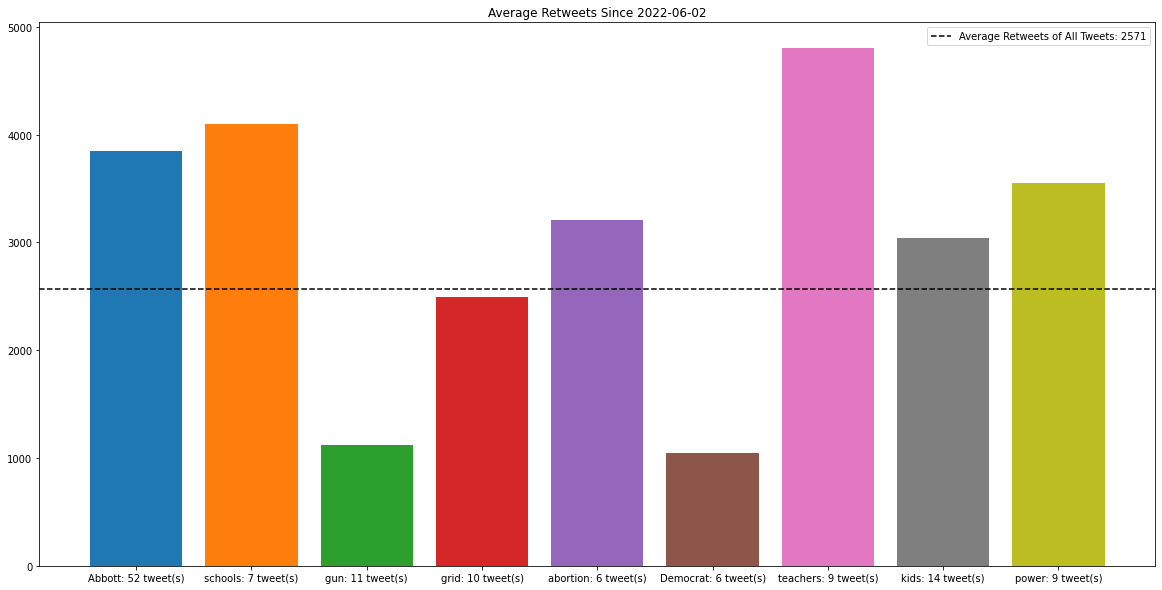

In [55]:
def barg_kws(df, metric, keyword_lst, over):
    """
    Creates a bargraph with keywords as the x and metrix as the y
    
    - df: a dataframe, needs Created_At and metric column
    - metric, a string representing the title of the metric column
    - keyword_lst, a list of strings w keywords
    - over, integer. graph will only include keywords that were tweeted about
        over number of times
    """
    #setting the size
    plt.rcParams["figure.figsize"]=20,10
    
    #creating the title
    earliest_date = df["Created_At"][len(df) - 1].date()
    plt.title("Average " + metric + " Since " + str(earliest_date))
    
    #so that i can use a different color for each bar
        #the code "color=next(prop_iter)['color']" in plt.bar relies on this 
    prop_iter = iter(plt.rcParams['axes.prop_cycle'])
    
    #creating a line w all tweet average
    all_av = average(df, metric)
    plt.axhline(y = all_av, color = 'black', linestyle='dashed', label = ("Average " + metric + " of All Tweets: " + str(all_av)))

    #plotting each bar & their average
    for i in keyword_lst:
        keydf = keyword_df(df, i)
        num_tweets = len(keydf) 
        if num_tweets < over:
            continue
        av = average(keydf, metric)
        x = i + ": " + str(num_tweets) + " tweet(s)"
        
        plt.bar(x, av, color=next(prop_iter)['color'])
    
    plt.legend()
        
kws = ["Abbott", 'schools', 'gun', 'grid', 'abortion','GOP', 
       'Republican', 'Democrat','teachers', 'kids', 'parents', 'education', 
       'jobs', 'border', 'lights', 'power']
barg_kws(rts,"Retweets", kws, 5)
plt.savefig("/Users/sejalgupta/Documents/BETO WORK/twitter/kwbargraph1.jpg")

In [13]:
#what else do i want to explore w keywords? 